In [56]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

# plt.ion()

In [65]:
episode_durations = []

In [165]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return np.concatenate([
        ret[:n-1] / np.arange(1, n),
        ret[n-1:] / n,
    ])

def plot_durations(title='Training...'):
    plt.figure(2)
    plt.clf()
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(episode_durations, label='Episode duration')
    # Take 100 episode averages and plot them too
    if len(episode_durations) >= 2:
        n = np.min([len(episode_durations), 100])
        means = moving_average(episode_durations, n=n)
        plt.plot(means, label='Mean episode duration')

    plt.legend(loc='upper left')
    plt.pause(0.1)  # pause a bit so that plots are updated
    if is_ipython:
        display.clear_output(wait=True)

78 60


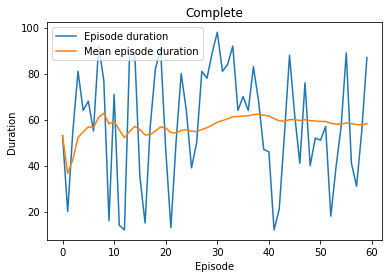

In [166]:
means = np.concatenate([
    moving_average(episode_durations[2*N-3::-1], n=N),
    moving_average(episode_durations, n=N),
])
print(len(means), len(episode_durations))

plot_durations('Complete')
plt.show()

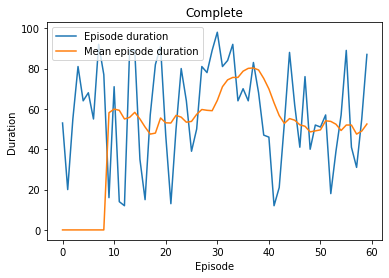

In [88]:
num_episodes = 10
for i_episode in range(num_episodes):
    episode_durations.append(np.random.randint(10, 100))
    plot_durations()

# plt.ioff()
plot_durations('Complete')
plt.show()

In [73]:
x = range(len(episode_durations))
z = np.polyfit(x, episode_durations, 2)
p = np.poly1d(z)
p(x)

array([53.27272727, 54.34545455, 55.41818182, 56.49090909, 57.56363636,
       58.63636364, 59.70909091, 60.78181818, 61.85454545, 62.92727273])

In [82]:
means = moving_average(episode_durations, n=10)
means = np.concatenate([np.zeros(4), moving_average(episode_durations[:10], n=5), means])
means

array([ 0. ,  0. ,  0. ,  0. , 54.6, 57.6, 64.6, 72. , 71.2, 61.6, 58.1,
       59.9, 59.3, 55. , 55.8, 58.3, 55. , 51. , 47.5, 48. , 55.5, 53.1,
       53. , 56.8, 55.9, 53.4, 53.8, 57.3, 59.7, 59.3, 59.1, 64.2, 71. ,
       74.4, 75.6, 75.6, 78.7, 80.1, 80.3, 79.3, 75.1])

In [84]:
N = 10
np.convolve(episode_durations, np.ones((N,))/N, mode='valid')

array([58.1, 59.9, 59.3, 55. , 55.8, 58.3, 55. , 51. , 47.5, 48. , 55.5,
       53.1, 53. , 56.8, 55.9, 53.4, 53.8, 57.3, 59.7, 59.3, 59.1, 64.2,
       71. , 74.4, 75.6, 75.6, 78.7, 80.1, 80.3, 79.3, 75.1])

In [102]:
episode_durations[:10]

[53, 20, 55, 81, 64, 68, 55, 92, 77, 16]

In [121]:
len(moving_average(episode_durations[::-1], 10)), len(moving_average(episode_durations, 10))

(51, 51)

In [131]:
moving_average(episode_durations[20::-1].copy(), 10)[::-1]

array([58.1, 59.9, 59.3, 55. , 55.8, 58.3, 55. , 51. , 47.5, 48. , 55.5,
       53.1])

In [123]:
moving_average(episode_durations, 10)

array([58.1, 59.9, 59.3, 55. , 55.8, 58.3, 55. , 51. , 47.5, 48. , 55.5,
       53.1, 53. , 56.8, 55.9, 53.4, 53.8, 57.3, 59.7, 59.3, 59.1, 64.2,
       71. , 74.4, 75.6, 75.6, 78.7, 80.1, 80.3, 79.3, 75.1, 69.9, 63. ,
       56.7, 52.8, 55.2, 54.4, 52.1, 51.4, 48.6, 49.1, 49.6, 54.1, 53.8,
       52.4, 49.3, 52. , 52. , 47.5, 49. , 52.5])

In [132]:
np.cumsum(episode_durations, dtype=float)

array([  53.,   73.,  128.,  209.,  273.,  341.,  396.,  488.,  565.,
        581.,  652.,  666.,  678.,  767.,  856.,  891.,  906.,  963.,
       1045., 1136., 1183., 1196., 1246., 1326., 1390., 1429., 1479.,
       1560., 1638., 1727., 1825., 1906., 1990., 2082., 2146., 2216.,
       2280., 2363., 2431., 2478., 2524., 2536., 2557., 2610., 2698.,
       2760., 2801., 2877., 2917., 2969., 3020., 3077., 3095., 3134.,
       3191., 3280., 3321., 3352., 3407., 3494.])

In [135]:
np.cumsum(episode_durations[::-1], dtype=float)

array([  87.,  142.,  173.,  214.,  303.,  360.,  399.,  417.,  474.,
        525.,  577.,  617.,  693.,  734.,  796.,  884.,  937.,  958.,
        970., 1016., 1063., 1131., 1214., 1278., 1348., 1412., 1504.,
       1588., 1669., 1767., 1856., 1934., 2015., 2065., 2104., 2168.,
       2248., 2298., 2311., 2358., 2449., 2531., 2588., 2603., 2638.,
       2727., 2816., 2828., 2842., 2913., 2929., 3006., 3098., 3153.,
       3221., 3285., 3366., 3421., 3441., 3494.])

In [140]:
n = 10
ret = np.cumsum(episode_durations, dtype=float)
ret[n:] = ret[n:] - ret[:-n]
ret

array([ 53.,  73., 128., 209., 273., 341., 396., 488., 565., 581., 599.,
       593., 550., 558., 583., 550., 510., 475., 480., 555., 531., 530.,
       568., 559., 534., 538., 573., 597., 593., 591., 642., 710., 744.,
       756., 756., 787., 801., 803., 793., 751., 699., 630., 567., 528.,
       552., 544., 521., 514., 486., 491., 496., 541., 538., 524., 493.,
       520., 520., 475., 490., 525.])

In [141]:
n = 10
ret = np.cumsum(episode_durations[::-1], dtype=float)
ret[n:] = ret[n:] - ret[:-n]
ret

array([ 87., 142., 173., 214., 303., 360., 399., 417., 474., 525., 490.,
       475., 520., 520., 493., 524., 538., 541., 496., 491., 486., 514.,
       521., 544., 552., 528., 567., 630., 699., 751., 793., 803., 801.,
       787., 756., 756., 744., 710., 642., 591., 593., 597., 573., 538.,
       534., 559., 568., 530., 531., 555., 480., 475., 510., 550., 583.,
       558., 550., 593., 599., 581.])

In [147]:
n = 10
ret = np.cumsum(episode_durations, dtype=float)
ret[n:] = ret[n:] - ret[:-n]
ret[n - 1:] / n

array([58.1, 59.9, 59.3, 55. , 55.8, 58.3, 55. , 51. , 47.5, 48. , 55.5,
       53.1, 53. , 56.8, 55.9, 53.4, 53.8, 57.3, 59.7, 59.3, 59.1, 64.2,
       71. , 74.4, 75.6, 75.6, 78.7, 80.1, 80.3, 79.3, 75.1, 69.9, 63. ,
       56.7, 52.8, 55.2, 54.4, 52.1, 51.4, 48.6, 49.1, 49.6, 54.1, 53.8,
       52.4, 49.3, 52. , 52. , 47.5, 49. , 52.5])

In [146]:
n = 10
ret = np.cumsum(episode_durations[::-1], dtype=float)
ret[n:] = ret[n:] - ret[:-n]
ret[n - 1:] / n

array([52.5, 49. , 47.5, 52. , 52. , 49.3, 52.4, 53.8, 54.1, 49.6, 49.1,
       48.6, 51.4, 52.1, 54.4, 55.2, 52.8, 56.7, 63. , 69.9, 75.1, 79.3,
       80.3, 80.1, 78.7, 75.6, 75.6, 74.4, 71. , 64.2, 59.1, 59.3, 59.7,
       57.3, 53.8, 53.4, 55.9, 56.8, 53. , 53.1, 55.5, 48. , 47.5, 51. ,
       55. , 58.3, 55.8, 55. , 59.3, 59.9, 58.1])

In [148]:
ret[n - 1:]

array([581., 599., 593., 550., 558., 583., 550., 510., 475., 480., 555.,
       531., 530., 568., 559., 534., 538., 573., 597., 593., 591., 642.,
       710., 744., 756., 756., 787., 801., 803., 793., 751., 699., 630.,
       567., 528., 552., 544., 521., 514., 486., 491., 496., 541., 538.,
       524., 493., 520., 520., 475., 490., 525.])

In [156]:
ret[:n-1] / np.arange(1, n)

array([53.        , 36.5       , 42.66666667, 52.25      , 54.6       ,
       56.83333333, 56.57142857, 61.        , 62.77777778])

In [164]:
np.min([len(episode_durations), 100])

60